# **Application of machine learning for forecasting Urals loading (Python)**

## **Preparation of the Working Environment on Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
df_data = pd.read_excel("/Volumes/T7 1TB SSD/Empirical_Analysis_FM/Applied_Research_Framework_Git/Applied_projects/Crude_oil_market_analysis/Regression_Urals_loading_analysis_mod.xlsx", sheet_name="Data")
print(df_data)

          Date  LCOc1  NWEMURLCRKMc1   .IMOEX    RSX  BFO-URL-NWE  \
0   2017-01-06  56.75      -0.545276  2213.93  21.52        -2.50   
1   2017-01-13  55.59       1.238238  2195.19  21.45        -2.05   
2   2017-01-20  55.49       0.386498  2159.96  21.08        -1.50   
3   2017-01-27  55.46       0.348593  2266.05  22.08        -1.60   
4   2017-02-03  56.72       0.219638  2226.61  21.80        -1.75   
..         ...    ...            ...      ...    ...          ...   
230 2021-10-22  85.77       7.090000  4196.96  32.67        -1.80   
231 2021-10-29  84.38       3.930000  4150.00  32.00        -1.40   
232 2021-11-05  82.55       1.860000  4174.76  31.93        -1.60   
233 2021-11-12  81.95       1.750000  4121.66  31.27        -1.45   
234 2021-11-19  78.66       0.030000  4016.47  29.92        -1.65   

     Urals loading  
0     1.391864e+07  
1     1.480585e+07  
2     1.377569e+07  
3     1.332605e+07  
4     1.538791e+07  
..             ...  
230   1.347257e+07  
231

In [ ]:
# Eliminate the columns that will not be used

columns_to_remove = ['Date', 'Urals loading', 'RSX','BFO-URL-NWE']
predictor_columns = [col for col in df_data.columns if col not in columns_to_remove]

# Isolate the Urals loading into a separate DataFrame

df_variables = df_data[predictor_columns]
df_urals_with_date = df_data[['Date','Urals loading']].copy()
df_urals = df_data[['Urals loading']].copy()

print(df_variables.info())
print(df_variables.describe())
print(df_variables.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LCOc1          235 non-null    float64
 1   NWEMURLCRKMc1  235 non-null    float64
 2   .IMOEX         235 non-null    float64
dtypes: float64(3)
memory usage: 5.6 KB
None
            LCOc1  NWEMURLCRKMc1       .IMOEX
count  235.000000     235.000000   235.000000
mean    61.055234       1.921163  2717.419787
std     12.532270       3.318333   614.849057
min     21.800000     -16.340000  1822.910000
25%     52.715000       0.225000  2264.215000
50%     62.710000       1.850000  2572.230000
75%     70.065000       3.480000  3050.755000
max     85.770000      15.140000  4261.820000
   LCOc1  NWEMURLCRKMc1   .IMOEX
0  56.75      -0.545276  2213.93
1  55.59       1.238238  2195.19
2  55.49       0.386498  2159.96
3  55.46       0.348593  2266.05
4  56.72       0.219638  2226.61


In [ ]:
# Analysis of the data from the Urals loading patterns
print(df_urals.info())
print(df_urals.describe())
print(df_urals.head())

arith_returns = df_variables.pct_change().dropna()

print(df_urals['Urals loading'].pct_change().dropna().head())
print(df_urals['Urals loading'].pct_change().dropna().describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Urals loading  235 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB
None
       Urals loading
count   2.350000e+02
mean    1.212411e+07
std     3.074369e+06
min     3.400765e+06
25%     1.006115e+07
50%     1.248339e+07
75%     1.436140e+07
max     1.916448e+07
   Urals loading
0     13918639.0
1     14805846.0
2     13775694.0
3     13326052.0
4     15387914.0
1    0.063742
2   -0.069577
3   -0.032640
4    0.154724
5   -0.041196
Name: Urals loading, dtype: float64
count    234.000000
mean       0.032697
std        0.287009
min       -0.643127
25%       -0.127627
50%       -0.016139
75%        0.139108
max        1.995916
Name: Urals loading, dtype: float64


In [6]:
from scipy import stats

df_variables_standardized = (df_variables - df_variables.mean()) / df_variables.std()
df_urals_standardized = (df_urals - df_urals.mean()) / df_urals.std()

df_variables_zscore = df_variables_standardized[(np.abs(stats.zscore(df_variables_standardized)) < 3).all(axis=1)]
df_urals_zscore = df_urals_standardized[(np.abs(stats.zscore(df_urals_standardized)) < 3).all(axis=1)]

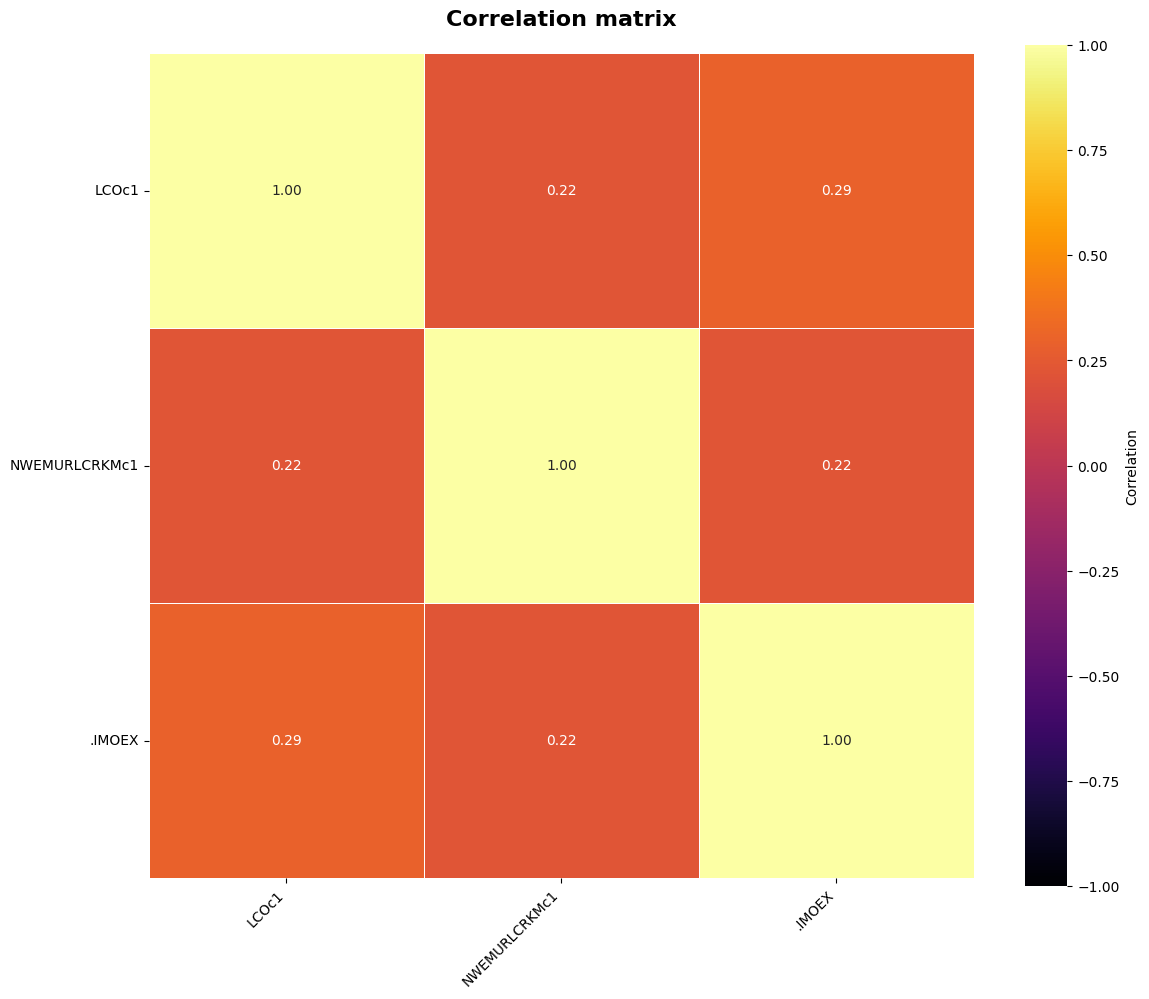

In [7]:
import seaborn as sns

correlation_matrix = df_variables_zscore.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, 
            cmap='inferno',
            vmin=-1, 
            vmax=1,
            center=0,
            square=True, 
            linewidths=0.5,
            annot=True, 
            fmt=".2f",
            cbar_kws={"label": "Correlation"})

plt.title('Correlation matrix', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
corr_matrix = df_variables_zscore[['NWEMURLCRKMc1', '.IMOEX','LCOc1']].corr()
print(corr_matrix)

               NWEMURLCRKMc1    .IMOEX    LCOc1
NWEMURLCRKMc1       1.000000  0.218897  0.22111
.IMOEX              0.218897  1.000000  0.29151
LCOc1               0.221110  0.291510  1.00000


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_variables_zscore[['NWEMURLCRKMc1', '.IMOEX','LCOc1']]
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        VIF
0  1.081505
1  1.123632
2  1.125294


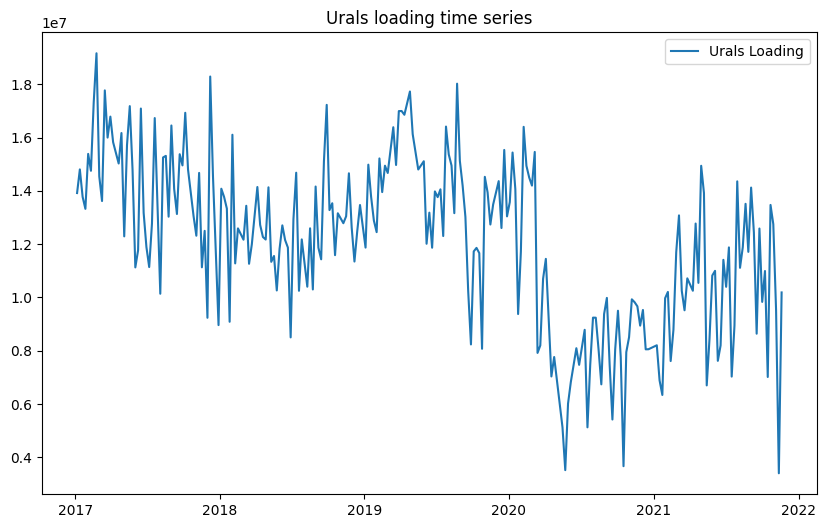

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_urals_with_date['Date'], df_urals_with_date['Urals loading'], label='Urals Loading')
plt.title('Urals loading time series')
plt.legend()
plt.show()

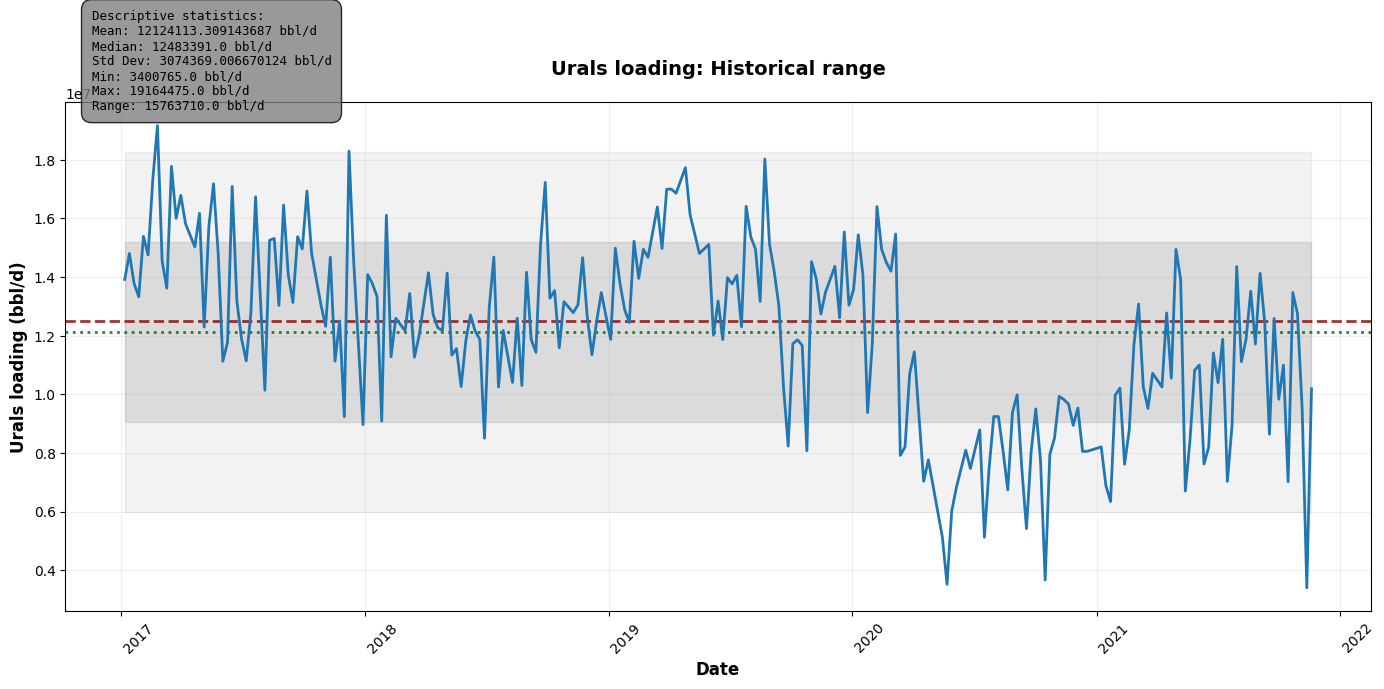

In [11]:
median_loading = df_urals_with_date['Urals loading'].median()
mean_loading = df_urals_with_date['Urals loading'].mean()
std_loading = df_urals_with_date['Urals loading'].std()

# Calculate bands for visualization
upper_band = mean_loading + std_loading
lower_band = mean_loading - std_loading
upper_2std = mean_loading + (2 * std_loading)
lower_2std = mean_loading - (2 * std_loading)


fig, ax = plt.subplots(figsize=(14, 7))

# Plot the actual time series (on top)
ax.plot(df_urals_with_date['Date'], df_urals_with_date['Urals loading'], 
        color='#1f77b4', linewidth=2, label='Urals loading', zorder=3)

# Add shaded bands (1 standard deviation - light grey)
ax.fill_between(df_urals_with_date['Date'], lower_band, upper_band, 
                color='grey', alpha=0.2, label='±1 Std Dev', zorder=1)

# Add shaded bands (2 standard deviations - lighter grey)
ax.fill_between(df_urals_with_date['Date'], lower_2std, upper_2std, 
                color='grey', alpha=0.1, label='±2 Std Dev', zorder=0)

# Add median/mean lines
ax.axhline(y=median_loading, color='darkred', linestyle='--', linewidth=2, 
           label=f'Median: {median_loading:.2f}', alpha=0.8, zorder=2)

ax.axhline(y=mean_loading, color='darkgreen', linestyle=':', linewidth=2, 
           label=f'Mean: {mean_loading:.2f}', alpha=0.8, zorder=2)

# Styling
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Urals loading (bbl/d)', fontsize=12, fontweight='bold')
ax.set_title('Urals loading: Historical range', 
             fontsize=14, fontweight='bold', pad=20)


ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)


# Add statistics box
stats_text = f'''Descriptive statistics:
Mean: {mean_loading} bbl/d
Median: {median_loading} bbl/d
Std Dev: {std_loading} bbl/d
Min: {df_urals_with_date['Urals loading'].min()} bbl/d
Max: {df_urals_with_date['Urals loading'].max()} bbl/d
Range: {df_urals_with_date['Urals loading'].max() - df_urals_with_date['Urals loading'].min()} bbl/d'''

ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=9,
        verticalalignment='bottom', family='monospace',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.8, pad=0.8))

# Format x-axis dates
fig.autofmt_xdate(rotation=45, ha='left')

# Tight layout
plt.tight_layout()
plt.show()


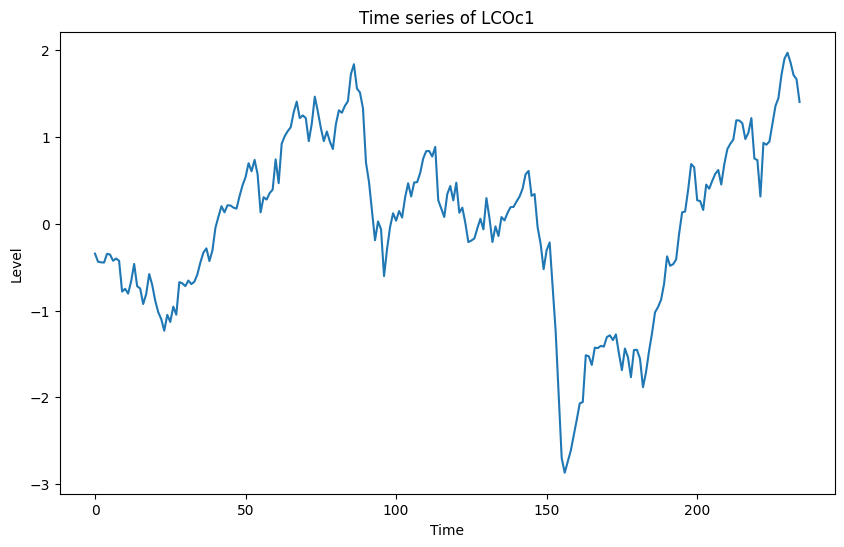

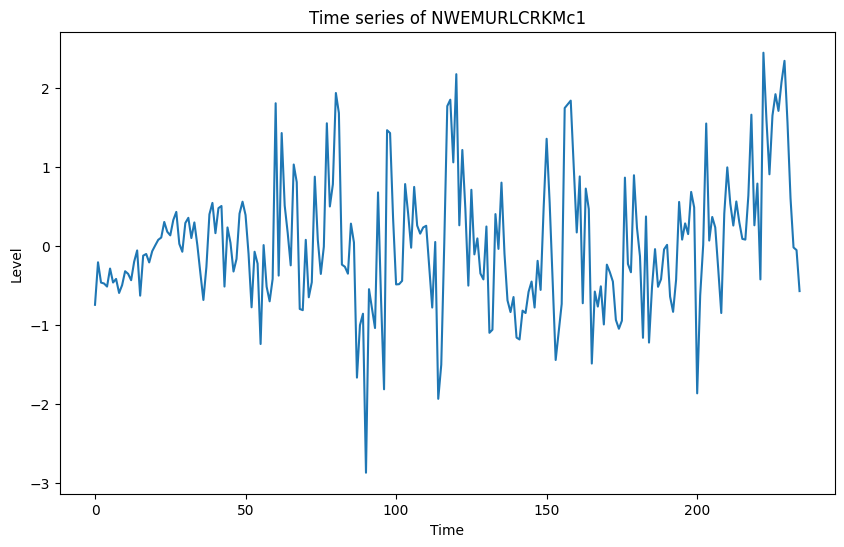

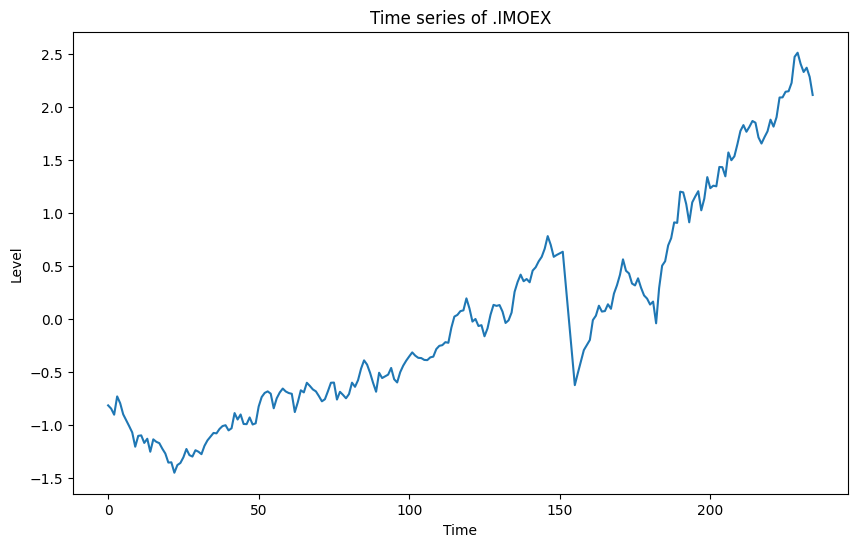

In [12]:
for column in df_variables_zscore:
    
    plt.figure(figsize=(10, 6))
    df_variables_zscore[column].plot(title=f"Time series of {column}")
    plt.title(f"Time series of {column}")
    plt.xlabel("Time")
    plt.ylabel("Level")
    plt.show()

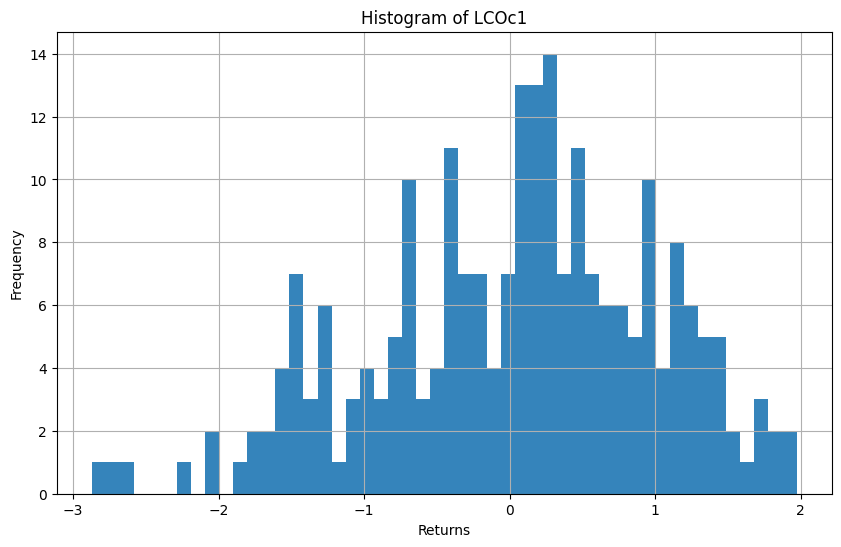

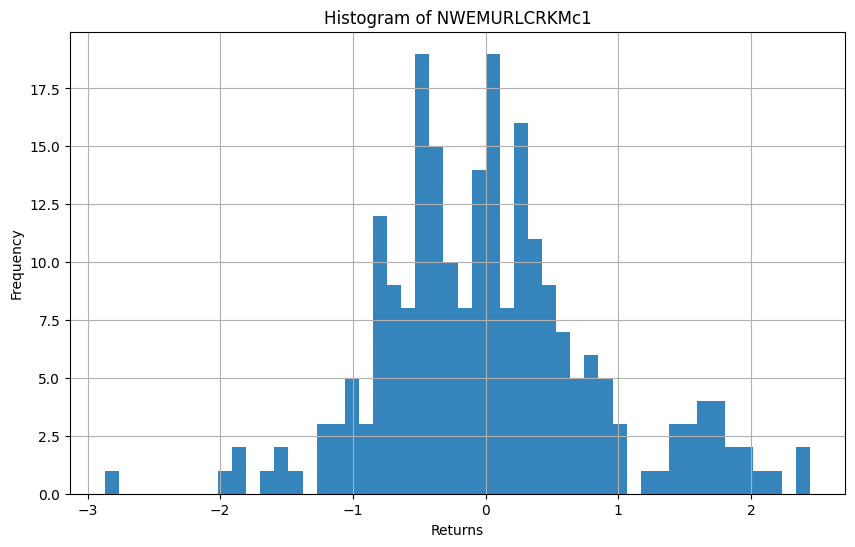

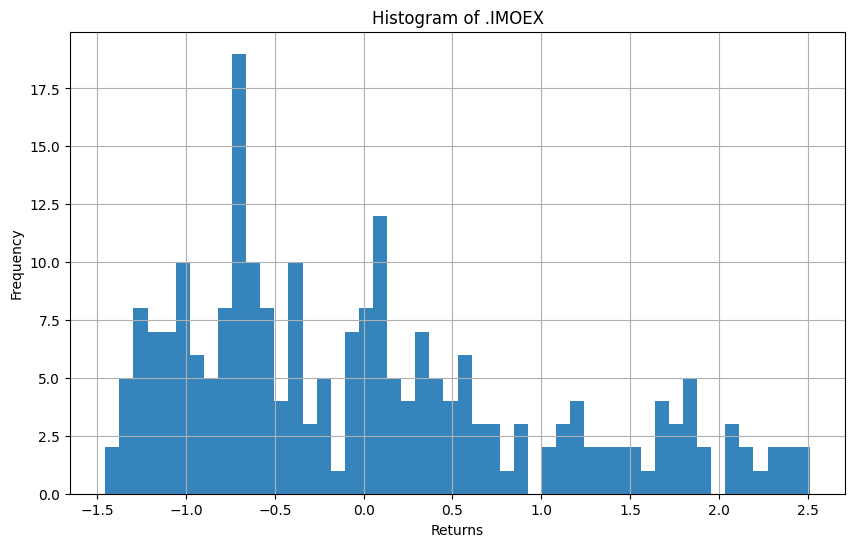

In [13]:
for column in df_variables_zscore:
   
    plt.figure(figsize=(10, 6))
    df_variables_zscore[column].hist(bins=50, alpha=0.9)
    plt.title(f"Histogram of {column}")
    plt.xlabel("Returns")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [14]:
# Drop the 'Date' column from the features dataset
if 'Date' in df_variables_zscore:
    df_variables_zscore = df_variables_zscore.drop('Date', axis=1)

df_urals_zscore = df_urals_standardized

if 'Date' in df_urals_zscore:
    df_urals_zscore = df_urals_zscore.drop('Date', axis=1)

# Assuming df_urals is the target variable DataFrame
y = df_urals_zscore

In [15]:
# Scaling of the dataset to better handle the modeling of the machine learning programs

scaler = MinMaxScaler()
x = df_variables
y = df_urals_zscore

# Split the dataset into training and testing sets without shuffling to preserve time series order
X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(df_variables, y, train_size=0.6, shuffle=False)

# Convert the DataFrames to NumPy arrays for use in the neural network
X_train, X_test, Y_train, Y_test = X_train_df.to_numpy(), X_test_df.to_numpy(), Y_train_df.to_numpy(), Y_test_df.to_numpy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
training_values = scaler.fit_transform(Y_train)

## **1. Implementation of MLP and LSTM models on Urals data**

### 1.1 Deconstruction of the training sets

In [16]:
df_train = df_urals_zscore[df_urals_zscore.index < Y_test_df.index[0]]
df_test = df_urals_zscore[df_urals_zscore.index >= Y_test_df.index[0]]

train = df_train['Urals loading'].values
test = df_test['Urals loading'].values

training_values = scaler.fit_transform(train.reshape(-1, 1))

x_train = training_values[0:len(training_values)-120]
y_train = training_values[120:len(training_values)]

test_values = scaler.transform(test.reshape(-1, 1))

### 1.2 Implementation of an MLP model

In [17]:
# MLP model structure

model_MLP_Urals = Sequential()
model_MLP_Urals.add(Dense(2048, activation='relu'))
model_MLP_Urals.add(Dense(512, activation='relu'))
model_MLP_Urals.add(Dense(128, activation='relu'))
model_MLP_Urals.add(Dropout(0.25))
model_MLP_Urals.add(Dense(32, activation='relu'))
model_MLP_Urals.add(Dense(8, activation='relu'))
model_MLP_Urals.add(Dense(4, activation='relu'))
model_MLP_Urals.add(Dense(1))

In [18]:
# Parametrization of the MLP model (optimizer, loss type)

model_MLP_Urals.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
# Calibration of the MLP model parameters

model_MLP_Urals.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2592
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2258
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1883
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1427
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0899
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0777
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0686
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0567
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0738
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0658


In [20]:
# We perform a prediction of the model for the urals loading

price_MLP_Urals = model_MLP_Urals.predict(test_values)
price_MLP_Urals = scaler.inverse_transform(price_MLP_Urals)
price_MLP_Urals = np.squeeze(price_MLP_Urals.reshape(1,-1))
price_MLP_Urals

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([-0.36431646, -0.04830362, -0.3173894 , -0.25988662, -0.05881716,
       -0.20750786, -0.7052944 , -0.45841822,  0.04549249, -0.11276391,
       -0.16034544, -0.19306396, -0.05638423, -0.85114425, -0.82352877,
       -0.5677767 , -0.48810923, -0.9327757 , -0.8659532 , -1.0412103 ,
       -1.0620501 , -1.0063981 , -0.95031905, -0.83382446, -0.8937345 ,
       -0.76538646, -1.0412451 , -0.8933032 , -0.71909803, -0.7193951 ,
       -0.83769006, -0.95708275, -0.70527357, -0.64267385, -0.89340615,
       -1.03283   , -0.8379807 , -0.69254833, -0.86636966, -1.0608797 ,
       -0.8481781 , -0.79314095, -0.64821976, -0.6594542 , -0.6755161 ,
       -0.7495365 , -0.68964475, -0.8378641 , -0.83759123, -0.8230163 ,
       -0.94508845, -0.9863349 , -0.6438181 , -0.6192837 , -0.8804062 ,
       -0.7652077 , -0.46202123, -0.31339762, -0.614701  , -0.69077533,
       -0.5656408 , -0.6146765 , -0.3462914 , -0.58362734, -0.11263651,
       -0.2230354 , -0.9602086 , -0.7996812 , -0.55460405, -0.53

### 1.3 Implementation of the LSTM model

In [21]:
#Implementation of LSTM model

model_LSTM_Urals = Sequential()
model_LSTM_Urals.add(LSTM(128, return_sequences=True, input_shape=(None,1)))
model_LSTM_Urals.add(LSTM(64, return_sequences=False))
model_LSTM_Urals.add(Dropout(0.25))
model_LSTM_Urals.add(Dense(25, activation='relu'))
model_LSTM_Urals.add(Dense(1))

/opt/miniconda3/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# We arrange the parameters (optimizer, loss)
model_LSTM_Urals.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# Calibration of LSTM
model_LSTM_Urals.fit(x_train, y_train,epochs=10, batch_size=16)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2589
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2440
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2301
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2137
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1990
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1839
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1686
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1491
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1344
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1166


In [24]:
# Predictions for LSTM

price_LSTM_Urals = model_LSTM_Urals.predict(test_values)
price_LSTM_Urals = scaler.inverse_transform(price_LSTM_Urals)
price_LSTM_Urals = np.squeeze(price_LSTM_Urals)
price_LSTM_Urals

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([-0.59124273, -0.4774342 , -0.5743673 , -0.55369   , -0.4812319 ,
       -0.5348258 , -0.7147293 , -0.6250784 , -0.44347784, -0.500694  ,
       -0.5178377 , -0.5296211 , -0.48035315, -0.76938426, -0.7592088 ,
       -0.6645097 , -0.6357752 , -0.8011354 , -0.77490044, -0.86914414,
       -0.92577994, -0.8375808 , -0.8087199 , -0.7630062 , -0.7854556 ,
       -0.737143  , -0.8691985 , -0.78529   , -0.71983576, -0.71994615,
       -0.7644297 , -0.81174254, -0.71472174, -0.6917386 , -0.78532946,
       -0.85879344, -0.7645364 , -0.71002775, -0.7750573 , -0.9205828 ,
       -0.76828855, -0.7476565 , -0.69376534, -0.6978739 , -0.70376194,
       -0.73118037, -0.7089585 , -0.7644936 , -0.7643933 , -0.7590202 ,
       -0.80641717, -0.8259918 , -0.6921567 , -0.68319815, -0.7803554 ,
       -0.7370756 , -0.6263754 , -0.5729331 , -0.6815298 , -0.7093749 ,
       -0.66373724, -0.68152094, -0.58475846, -0.6702482 , -0.5006482 ,
       -0.5404171 , -0.81316   , -0.7501403 , -0.65975153, -0.65

In [25]:
'''
results_Urals_prediction = pd.DataFrame({
    'Urals_loadings': Y_test,
    'Pred_MLP_Urals': price_MLP_Urals,
    'Pred_LSTM_Urals': price_LSTM_Urals
})
'''

# Ensure Y_test is 1-dimensional
Y_test = Y_test.reshape(-1)

# Ensure predictions are 1-dimensional
price_MLP_Urals = np.squeeze(price_MLP_Urals)
price_LSTM_Urals = np.squeeze(price_LSTM_Urals)

# Results of the implemented models in a dataframe
results_Urals_prediction = pd.DataFrame({
    'Urals_loadings': Y_test,
    'Pred_MLP_Urals': price_MLP_Urals,
    'Pred_LSTM_Urals': price_LSTM_Urals
})

<Axes: >

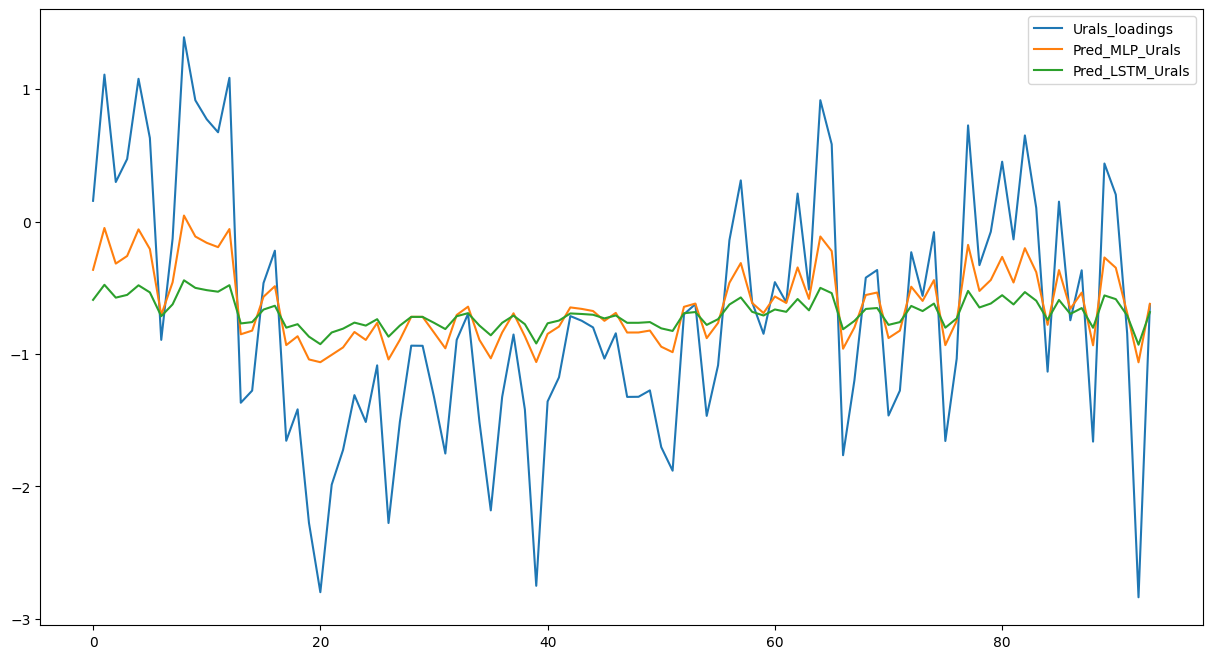

In [26]:
# Plotting the predictions against actual Urals prices for MLP and LSTM

results_Urals_prediction['Urals_loadings'].plot(legend='Real level of Urals', figsize=(15,8))
results_Urals_prediction['Pred_MLP_Urals'].plot(legend='Forecast MLP')
results_Urals_prediction['Pred_LSTM_Urals'].plot(legend='Forecast LSTM')

In [27]:
# Computation of the mean absolut error (MAE):

MAE_pred_MLP_Urals = mean_absolute_error(results_Urals_prediction['Urals_loadings'], results_Urals_prediction['Pred_MLP_Urals'])
MAE_pred_LSTM_Urals = mean_absolute_error(results_Urals_prediction['Urals_loadings'], results_Urals_prediction['Pred_LSTM_Urals'])
print("MAE for the forecasted MLP model:", MAE_pred_MLP_Urals)
print("MAE for the forecasted LSTM model:", MAE_pred_LSTM_Urals)

# Computation of the mean squared error (MSE):

MSE_pred_MLP_Urals = mean_squared_error(results_Urals_prediction['Urals_loadings'], results_Urals_prediction['Pred_MLP_Urals'])
MSE_pred_LSTM_Urals = mean_squared_error(results_Urals_prediction['Urals_loadings'], results_Urals_prediction['Pred_LSTM_Urals'])
print("MSE obtained for the forecasted MLP model:", MSE_pred_MLP_Urals)
print("MSE for the forecasted LSTM model:", MSE_pred_LSTM_Urals)

# Computation of the root mean squared error (RMSE):

RMSE_pred_MLP_Urals = np.sqrt(MSE_pred_MLP_Urals)
RMSE_pred_LSTM_Urals = np.sqrt(MSE_pred_LSTM_Urals)
print("RMSE obtained for the forecasted MLP model:", RMSE_pred_MLP_Urals)
print("RMSE for the forecasted LSTM model:", RMSE_pred_LSTM_Urals)

MAE for the forecasted MLP model: 0.5374549181138241
MAE for the forecasted LSTM model: 0.6738563957047282
MSE obtained for the forecasted MLP model: 0.4469828143492374
MSE for the forecasted LSTM model: 0.691129041492118
RMSE obtained for the forecasted MLP model: 0.6685677335537794
RMSE for the forecasted LSTM model: 0.8313417116277265


# **2. Implementation of alternative machine learning models**

### 2.1 SVM application

Suport Vector Machine (SVM) is a non-parametric machine learning technique that uses the concept of Support Vector Regression (SVR) to address regression problems. The C parameter is set to 1.0, controlling the trade-off between the model's complexity (and accuracy on training data) and the degree to which it generalizes.

In [28]:
# Creation of the SVM model characteristics

model_SVM = SVR(kernel='rbf', C=1.0, gamma='scale')

In [29]:
# Calibration of the random forest model

model_SVM.fit(X_train, Y_train)

/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [30]:
# Analysis of the price forecasting using the SVM

price_SVM = model_SVM.predict(X_test)
price_SVM

array([0.49553276, 0.4992784 , 0.50619393, 0.5116324 , 0.52230286,
       0.53893704, 0.52776283, 0.51270283, 0.51538929, 0.51710602,
       0.51901915, 0.46107502, 0.45317582, 0.43852597, 0.43879909,
       0.43751188, 0.44101285, 0.43983761, 0.44207831, 0.44281746,
       0.45313425, 0.45615904, 0.46296073, 0.45835953, 0.45897389,
       0.46405173, 0.46041088, 0.47356958, 0.48181663, 0.49283845,
       0.51087692, 0.49740923, 0.4943261 , 0.48369426, 0.48199265,
       0.48908756, 0.47938658, 0.47233541, 0.46898522, 0.46385832,
       0.46652081, 0.45087275, 0.47939536, 0.50352483, 0.50855867,
       0.52811384, 0.53759844, 0.559027  , 0.55814603, 0.60151612,
       0.60069753, 0.58421455, 0.55864751, 0.58621406, 0.5943199 ,
       0.60171719, 0.57453661, 0.59062807, 0.62089525, 0.60588838,
       0.60938124, 0.60854696, 0.63491427, 0.63468523, 0.62210341,
       0.65403144, 0.64383537, 0.64916947, 0.66443971, 0.68042259,
       0.68720722, 0.67944451, 0.68510913, 0.69168696, 0.68975

### 2.2 Random Forest application

Random Forest (RF) is a machine learning technique that works by building many decision trees during training and then showing the average forecast of all the trees. When using individual decision trees, especially for regression tasks, the risk of overfitting is higher. The ensemble method lowers this risk. In our project, it is created with 50 trees (n\_estimators) in the forest. The random\_state ensures that the results are reproducible.

In [31]:
# Creation of the RF model characteristics

model_rdmforest = RandomForestRegressor(n_estimators=50, random_state=42)

In [32]:
# Calibration of the random forest model

model_rdmforest.fit(X_train, Y_train)

/opt/miniconda3/lib/python3.13/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# Analysis of the price forecasting using the random forest

price_rdmforest = model_rdmforest.predict(X_test)
price_rdmforest

array([0.11805202, 0.2597106 , 0.51162767, 0.65019292, 0.29285602,
       0.28244765, 0.77787248, 0.53740346, 0.48590306, 0.20270987,
       0.11215999, 0.31558372, 0.21232032, 0.41205656, 0.39881363,
       0.35604366, 0.52537391, 0.54755732, 0.55002026, 0.4830035 ,
       0.38733405, 0.35446611, 0.35733843, 0.38662335, 0.08214193,
       0.30436024, 0.29419681, 0.35533907, 0.19337918, 0.48943255,
       0.45948271, 0.48475135, 0.23918067, 0.20396622, 0.24744992,
       0.11549361, 0.48118406, 0.40979501, 0.29464353, 0.3089195 ,
       0.44227989, 0.20882895, 0.35227033, 0.16583025, 0.36623933,
       0.38763399, 0.3797441 , 0.55740397, 0.57546815, 0.68970442,
       0.45727254, 0.34922521, 0.98781447, 0.05384248, 0.26015436,
       0.20567233, 0.2750196 , 0.33317234, 0.49544717, 0.30742329,
       0.40570205, 0.31986503, 0.19842323, 0.27424543, 0.42257863,
       0.5606946 , 0.77565225, 0.42777312, 0.5516802 , 0.48493634,
       0.57651371, 0.69462914, 0.47182675, 0.65540462, 0.66293

### 2.3 Gradient Boosting

Gradient Boosting (GB) creates an additive model one step at a time, and it can be used to improve any differentiable loss function. It is done by fitting a regression tree to the negative gradient of the given loss function at each stage. This lowers the residuals of the earlier models. The boosting method focuses on areas where the old models don't do well by adding weak learners one at a time. In our project, the model uses 50 trees with a learning rate of 0.1 and a maximum depth of 3 for each tree.

In [34]:
model_gboosting = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

In [35]:
# Calibration of the gradient boosting model
model_gboosting.fit(X_train, Y_train)

/opt/miniconda3/lib/python3.13/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,50
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [36]:
# Analysis of the price forecasting using the gradient boosting
price_gboosting = model_gboosting.predict(X_test)
price_gboosting

array([ 0.3086711 ,  0.25809226,  0.559262  ,  0.68160705,  0.51895022,
        0.36242972,  0.66873501,  0.61779613,  0.48255658,  0.04847331,
        0.33231239,  0.45554278,  0.22532775,  0.36191183,  0.29620335,
        0.75614454,  1.07510713,  1.07510713,  1.15671741,  0.53710633,
        0.89673308,  0.29644787,  0.6810612 ,  0.60327524, -0.08577948,
        0.31474518,  0.25770376,  0.28482686,  0.34118714,  0.72502078,
        0.72502078,  0.66705994,  0.31624917,  0.30413134,  0.34118714,
        0.20139727,  0.5281479 ,  0.61337079,  0.67271586,  0.13552253,
        0.61337079,  0.22532775,  0.06357289,  0.34146737,  0.4696289 ,
        0.40101669,  0.33166757,  0.52909861,  0.6231275 ,  0.62570395,
        0.76804032,  0.53835998,  1.01473508, -0.34109373,  0.1421629 ,
        0.13817231,  0.11664223, -0.06268284,  0.43108524,  0.41883237,
        0.42446067,  0.25043912, -0.19198361,  0.25322257,  0.43108524,
        0.41781198,  0.89608838,  0.31890693,  0.43108524,  0.06

### 2.4 Consolidation of the estimations of the Urals and comparison of the predictions

In [37]:
results_prediction_alternative = pd.DataFrame({'Pred_SVM': price_SVM , 'Pred_gboosting': price_gboosting, 'Pred_rdmforest': price_rdmforest})
results_prediction_alternative.head(n=5)
results_prediction_alternative.head(n=5)

,Pred_SVM,Pred_gboosting,Pred_rdmforest
0,0.495533,0.308671,0.118052
1,0.499278,0.258092,0.259711
2,0.506194,0.559262,0.511628
3,0.511632,0.681607,0.650193
4,0.522303,0.518950,0.292856


<Axes: >

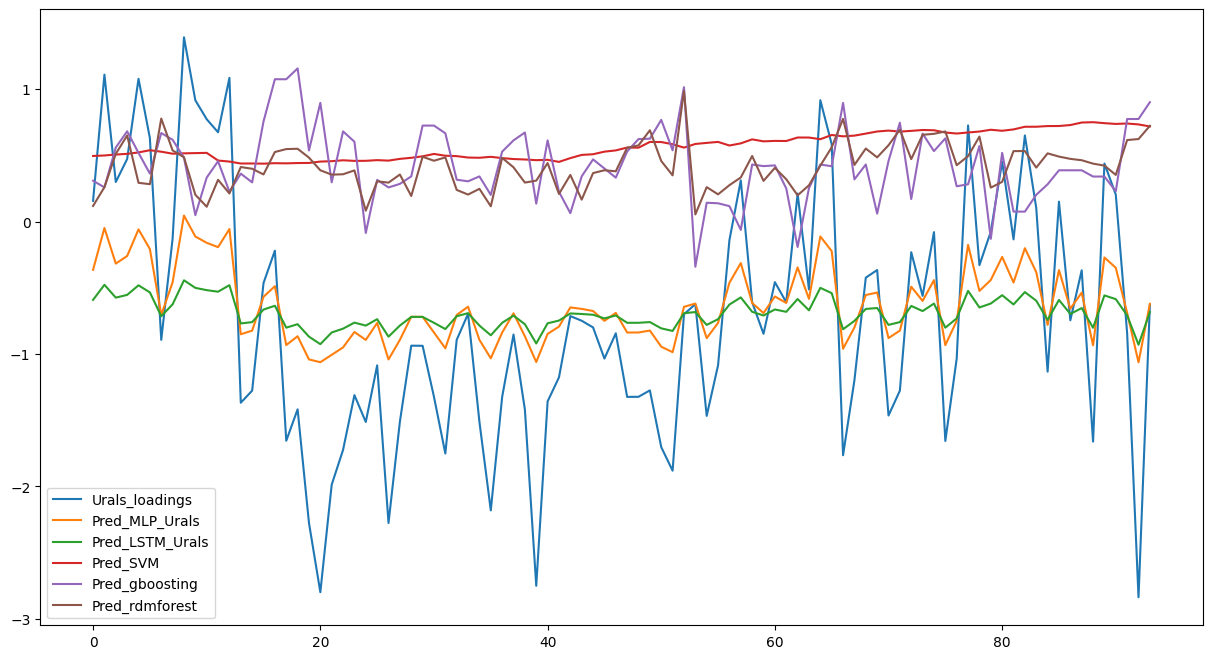

In [38]:
# Plot the consolidated forecasting results against the benchmark Urals index

results_Urals_prediction['Urals_loadings'].plot(legend='Real level of Urals', figsize=(15,8))
results_Urals_prediction['Pred_MLP_Urals'].plot(legend='Forecast MLP')
results_Urals_prediction['Pred_LSTM_Urals'].plot(legend='Forecast LSTM')
results_prediction_alternative['Pred_SVM'].plot(legend='Forecast SVM')
results_prediction_alternative['Pred_gboosting'].plot(legend='Forecast XGBoost')
results_prediction_alternative['Pred_rdmforest'].plot(legend='Forecast Random Forest')

In [39]:
# Computation of the mean absolut error (MAE):

MAE_pred_MLP_Urals = mean_absolute_error(results_Urals_prediction['Urals_loadings'], results_Urals_prediction['Pred_MLP_Urals'])
MAE_pred_LSTM_Urals = mean_absolute_error(results_Urals_prediction['Urals_loadings'], results_Urals_prediction['Pred_LSTM_Urals'])
MAE_pred_SVM_Urals = mean_absolute_error(results_Urals_prediction['Urals_loadings'], results_prediction_alternative['Pred_SVM'])
MAE_pred_gboosting_Urals = mean_absolute_error(results_Urals_prediction['Urals_loadings'], results_prediction_alternative['Pred_gboosting'])
MAE_pred_rdmforest_Urals = mean_absolute_error(results_Urals_prediction['Urals_loadings'], results_prediction_alternative['Pred_rdmforest'])

print("MAE obtained for the forecasted MLP model:", MAE_pred_MLP_Urals)
print("MAE obtained for the forecasted LSTM model:", MAE_pred_LSTM_Urals)
print("MAE obtained for the forecasted SVM model:", MAE_pred_SVM_Urals)
print("MAE obtained for the forecasted Gradient Boosting model:", MAE_pred_gboosting_Urals)
print("MAE obtained for the forecasted Random Forest model:", MAE_pred_rdmforest_Urals)

# Computation of the mean squared error (MSE):

MSE_pred_MLP_Urals = mean_squared_error(results_Urals_prediction['Urals_loadings'], results_Urals_prediction['Pred_MLP_Urals'])
MSE_pred_LSTM_Urals = mean_squared_error(results_Urals_prediction['Urals_loadings'], results_Urals_prediction['Pred_LSTM_Urals'])
MSE_pred_SVM_Urals = mean_squared_error(results_Urals_prediction['Urals_loadings'], results_prediction_alternative['Pred_SVM'])
MSE_pred_gboosting_Urals = mean_squared_error(results_Urals_prediction['Urals_loadings'], results_prediction_alternative['Pred_gboosting'])
MSE_pred_rdmforest_Urals = mean_squared_error(results_Urals_prediction['Urals_loadings'], results_prediction_alternative['Pred_rdmforest'])

print("MSE obtained for the forecasted MLP model:", MSE_pred_MLP_Urals)
print("MSE obtained for the forecasted LSTM model:", MSE_pred_LSTM_Urals)
print("MSE obtained for the forecasted SVM model:", MSE_pred_SVM_Urals)
print("MSE obtained for the forecasted Gradient Boosting model:", MSE_pred_gboosting_Urals)
print("MSE obtained for the forecasted Random Forest model:", MSE_pred_rdmforest_Urals)

# Computation of the root mean squared error (RMSE):

RMSE_pred_MLP_Urals = np.sqrt(MSE_pred_MLP_Urals)
RMSE_pred_LSTM_Urals = np.sqrt(MSE_pred_LSTM_Urals)
RMSE_pred_SVM_Urals = np.sqrt(MSE_pred_SVM_Urals)
RMSE_pred_gboosting_Urals = np.sqrt(MSE_pred_gboosting_Urals)
RMSE_pred_rdmforest_Urals = np.sqrt(MSE_pred_rdmforest_Urals)
print("RMSE obtained for the forecasted MLP model:", RMSE_pred_MLP_Urals)
print("RMSE obtained for the forecasted LSTM model:", RMSE_pred_LSTM_Urals)
print("RMSE obtained for the forecasted SVM model:", RMSE_pred_SVM_Urals)
print("RMSE obtained for the forecasted Gradient Boosting model:", RMSE_pred_gboosting_Urals)
print("RMSE obtained for the forecasted Random Forest model:", RMSE_pred_rdmforest_Urals)

MAE obtained for the forecasted MLP model: 0.5374549181138241
MAE obtained for the forecasted LSTM model: 0.6738563957047282
MAE obtained for the forecasted SVM model: 1.370492857869231
MAE obtained for the forecasted Gradient Boosting model: 1.3032623248831998
MAE obtained for the forecasted Random Forest model: 1.272136008386788
MSE obtained for the forecasted MLP model: 0.4469828143492374
MSE obtained for the forecasted LSTM model: 0.691129041492118
MSE obtained for the forecasted SVM model: 2.5052724519992045
MSE obtained for the forecasted Gradient Boosting model: 2.4057286363589414
MSE obtained for the forecasted Random Forest model: 2.227160264110156
RMSE obtained for the forecasted MLP model: 0.6685677335537794
RMSE obtained for the forecasted LSTM model: 0.8313417116277265
RMSE obtained for the forecasted SVM model: 1.58280524765342
RMSE obtained for the forecasted Gradient Boosting model: 1.551041145927129
RMSE obtained for the forecasted Random Forest model: 1.49236733551433